In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-23 15:29:03	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-02-23 15:29:03	Parsing datapackage to create a Study object
2016-02-23 15:29:39	Initializing Study
2016-02-23 15:29:39	Initializing Predictor configuration manager for Study
2016-02-23 15:29:39	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-23 15:29:39	Added ExtraTreesClassifier to default predictors
2016-02-23 15:29:39	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-23 15:29:39	Added ExtraTreesRegressor to default predictors
2016-02-23 15:29:39	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-23 15:29:39	Added GradientBoostingClassifier to default predictors
2016-02-23 15:29:39	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

In [2]:
figure_folder = '{}/waypointplots'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/waypointplots': File exists


In [3]:
waypoints = study.supplemental.waypoints.rename(columns={'Unnamed: 1': 'event_id'})

In [4]:
waypoints = waypoints.set_index('event_id', append=True)
waypoints.head()

0  \
phenotype event_id                                                           
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  2.220446e-16   
          exon:chr10:102286732-102286831:-@exon:chr10:102...  2.220446e-16   
          exon:chr10:103360960-103361093:+@exon:chr10:103...  9.499998e-01   
          exon:chr10:103563492-103563776:-@exon:chr10:103...  4.545454e-02   
          exon:chr10:103567487-103567658:-@exon:chr10:103...  2.220446e-16   

                                                                     1  
phenotype event_id                                                      
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  1.000000  
          exon:chr10:102286732-102286831:-@exon:chr10:102...  1.000000  
          exon:chr10:103360960-103361093:+@exon:chr10:103...  0.050000  
          exon:chr10:103563492-103563776:-@exon:chr10:103...  0.954545  
          exon:chr10:103567487-103567658:-@exon:chr10:103...  1.000000

In [5]:
import astrolabe

In [6]:
modalities_grouped = study.supplemental.modalities_tidy.groupby('phenotype')

In [7]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality  
MN         ambivalent       1
           bimodal        356
           excluded       541
           included      1553
NPC        ambivalent       3
           bimodal        751
           excluded      1049
           included      3029
iPSC       ambivalent      31
           bimodal       1348
           concurrent       1
           excluded      1558
           included      4632
dtype: int64

In [8]:
import matplotlib as mpl

In [9]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [10]:
from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER


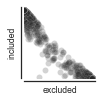

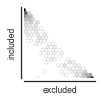

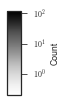

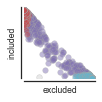

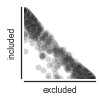

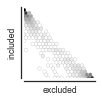

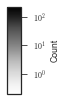

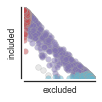

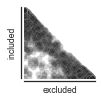

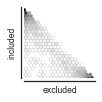

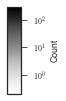

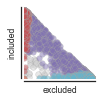

In [11]:
kinds = 'scatter', 'hexbin'

colorbar_ticklabels = [r'$10^{' + str(i) + '}$' for i in range(4)]

for phenotype, df in waypoints.groupby(level=0, axis=0):
    df.index = df.index.droplevel(0)
#     six.print_(df.head())
    
    for kind in kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = dict(rasterized=True, alpha=0.2) if kind == 'scatter' else dict()
        astrolabe.waypointplot(df, ax=ax, kind=kind, **kwargs)
        ax.set(title='')
        fig.tight_layout()
#         sns.despine(offset=2)
        fig.savefig('{}/{}_{}.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        if kind == 'hexbin':
            fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
            plt.colorbar(ax.collections[0], cax=ax_colorbar, 
                         orientation='vertical',  label='Count', 
                         ticks=[0, 1, 2, 3])#mpl.ticker.MaxNLocator(4))
            ax_colorbar.yaxis.set_ticklabels(colorbar_ticklabels)
            fig_colorbar.tight_layout()
            fig_colorbar.savefig('{}/{}_{}_colorbar.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    modality_df = modalities_grouped.get_group(phenotype)
    groupby = modality_df.set_index('event_id')['modality']
    astrolabe.waypointplot(df, ax=ax, kind='scatter', rasterized=True, features_groupby=groupby)
    ax.set(title='')
#     sns.despine(offset=3)
    fig.tight_layout()
    fig.savefig('{}/{}_{}.pdf'.format(figure_folder, phenotype, kind), dpi=300)
